# DECISION TREE
Objective:
The objective of this assignment is to apply Decision Tree Classification to a given dataset, analyse the performance of the model, and interpret the results.
Tasks:
1. Data Preparation:
Load the dataset into your preferred data analysis environment (e.g., Python with libraries like Pandas and NumPy).
2. Exploratory Data Analysis (EDA):
Perform exploratory data analysis to understand the structure of the dataset.
Check for missing values, outliers, and inconsistencies in the data.
Visualize the distribution of features, including histograms, box plots, and correlation matrices.
3. Feature Engineering:
If necessary, perform feature engineering techniques such as encoding categorical variables, scaling numerical features, or handling missing values.
4. Decision Tree Classification:
Split the dataset into training and testing sets (e.g., using an 80-20 split).
Implement a Decision Tree Classification model using a library like scikit-learn.
Train the model on the training set and evaluate its performance on the testing set using appropriate evaluation metrics (e.g., accuracy, precision, recall, F1-score, ROC-AUC).
5. Hyperparameter Tuning:
Perform hyperparameter tuning to optimize the Decision Tree model. Experiment with different hyperparameters such as maximum depth, minimum samples split, and criterion.
6. Model Evaluation and Analysis:
Analyse the performance of the Decision Tree model using the evaluation metrics obtained.
Visualize the decision tree structure to understand the rules learned by the model and identify important features
Interview Questions:
1. What are some common hyperparameters of decision tree models, and how do they affect the model's performance?
2. What is the difference between the Label encoding and One-hot encoding?




age	Age in years
Gender	Gender ; Male - 1, Female -0
cp	Chest pain type
trestbps	Resting blood pressure
chol	cholesterol measure
fbs	(fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
restecg	"ecg observation at resting condition,   -- Value 0: normal
        -- Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
        -- Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria"
thalch	maximum heart rate achieved
exang	exercise induced angina
oldpeak	ST depression induced by exercise relative to rest
slope	the slope of the peak exercise ST segment
thal	Thal
num	target [0=no heart disease; 1,2,3,4 = stages of heart disease ]


In [ ]:
#1. Data Preparation:
#Load the dataset into your preferred data analysis environment (e.g., Python with libraries like Pandas and NumPy).

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder



In [ ]:
#2. Exploratory Data Analysis (EDA):
#Perform exploratory data analysis to understand the structure of the dataset.
#Check for missing values, outliers, and inconsistencies in the data.

df=pd.read_excel("heart_disease.xlsx",sheet_name =1)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 908 entries, 0 to 907
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       908 non-null    int64  
 1   sex       908 non-null    object 
 2   cp        908 non-null    object 
 3   trestbps  908 non-null    int64  
 4   chol      908 non-null    int64  
 5   fbs       908 non-null    bool   
 6   restecg   908 non-null    object 
 7   thalch    908 non-null    int64  
 8   exang     908 non-null    object 
 9   oldpeak   846 non-null    float64
 10  slope     908 non-null    object 
 11  thal      908 non-null    object 
 12  num       908 non-null    int64  
dtypes: bool(1), float64(1), int64(5), object(6)
memory usage: 86.1+ KB


In [ ]:
df.head(100)

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
0,63,Male,typical angina,145,233,True,lv hypertrophy,150,False,2.3,downsloping,fixed defect,0
1,41,Male,atypical angina,135,203,False,normal,132,False,0.0,flat,fixed defect,0
2,57,Male,asymptomatic,140,192,False,normal,148,False,0.4,flat,fixed defect,0
3,52,Male,typical angina,118,186,False,lv hypertrophy,190,False,0.0,flat,fixed defect,0
4,57,Male,asymptomatic,110,201,False,normal,126,True,1.5,flat,fixed defect,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,41,Female,atypical angina,105,198,False,normal,168,False,0.0,upsloping,normal,0
96,52,Male,non-anginal,138,223,False,normal,169,False,0.0,upsloping,normal,0
97,44,Male,non-anginal,120,226,False,normal,169,False,0.0,upsloping,normal,0
98,45,Male,atypical angina,128,308,False,lv hypertrophy,170,False,0.0,upsloping,normal,0


In [ ]:
df["thal"].value_counts()

,count
thal,
normal,386
reversable defect,346
fixed defect,176


<Axes: xlabel='age', ylabel='Count'>

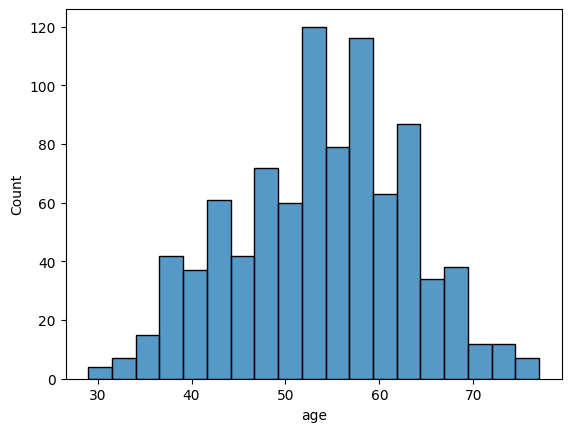

In [ ]:
sns.histplot(df["age"])

<Axes: xlabel='trestbps', ylabel='Count'>

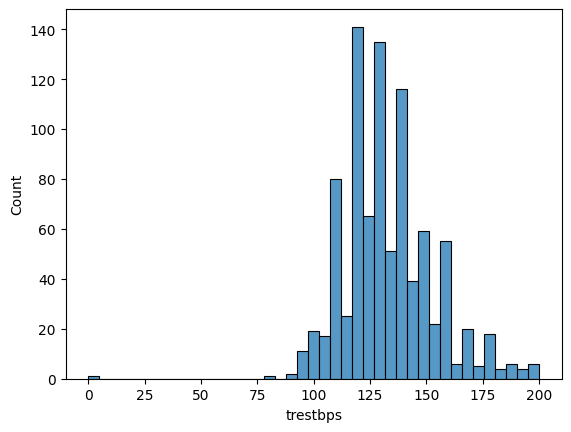

In [ ]:
sns.histplot(df["trestbps"])

<Axes: xlabel='chol', ylabel='Count'>

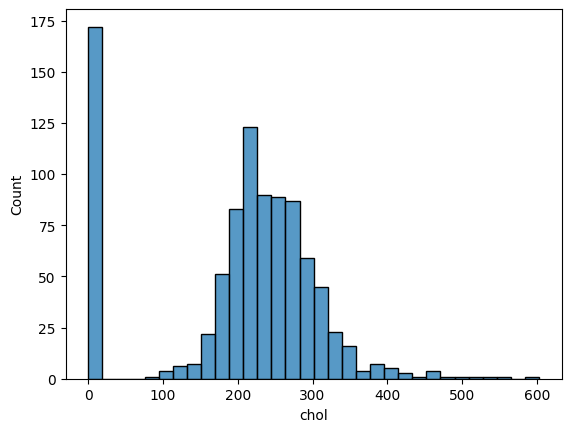

In [ ]:
sns.histplot(df["chol"])

<Axes: xlabel='thalch', ylabel='Count'>

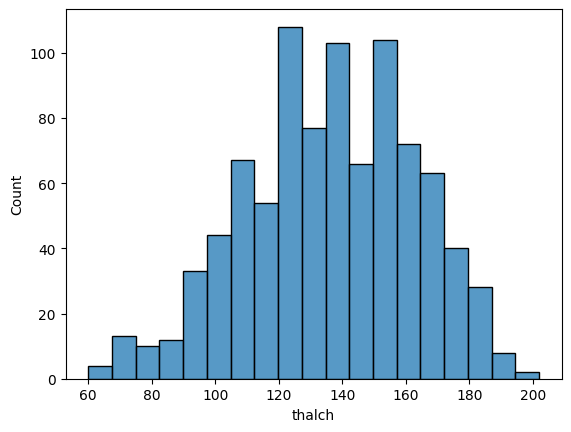

In [ ]:
sns.histplot(df["thalch"])

<Axes: xlabel='oldpeak', ylabel='Count'>

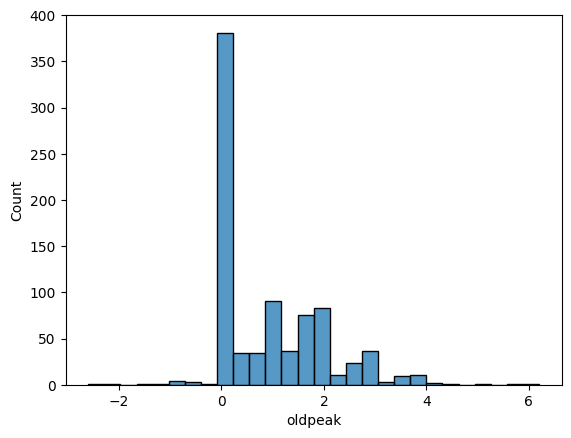

In [ ]:
sns.histplot(df["oldpeak"])

<Axes: ylabel='age'>

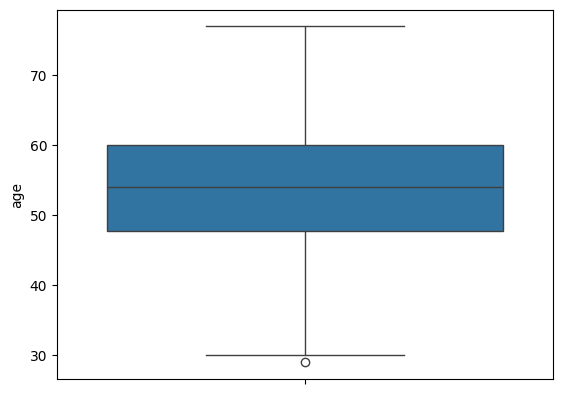

In [ ]:
sns.boxplot(df["age"])

<Axes: ylabel='trestbps'>

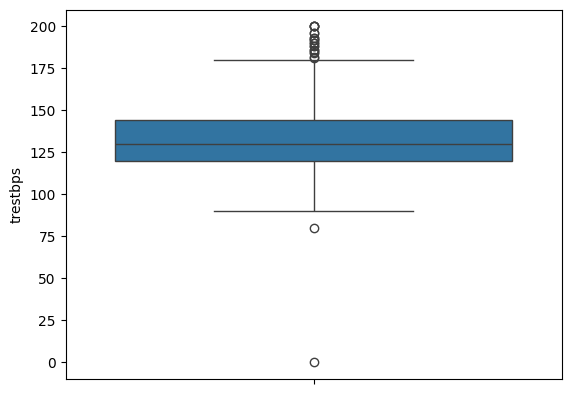

In [ ]:
sns.boxplot(df["trestbps"])

<Axes: ylabel='chol'>

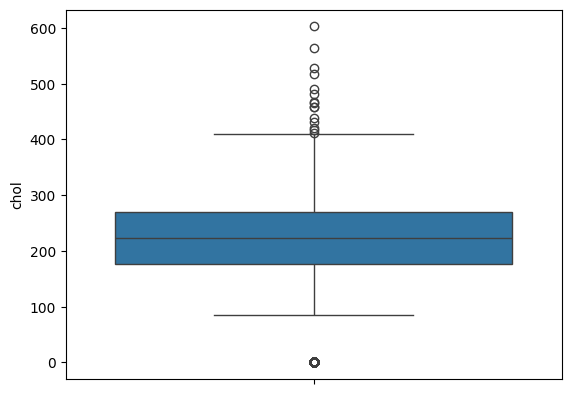

In [ ]:
sns.boxplot(df["chol"])

<Axes: ylabel='thalch'>

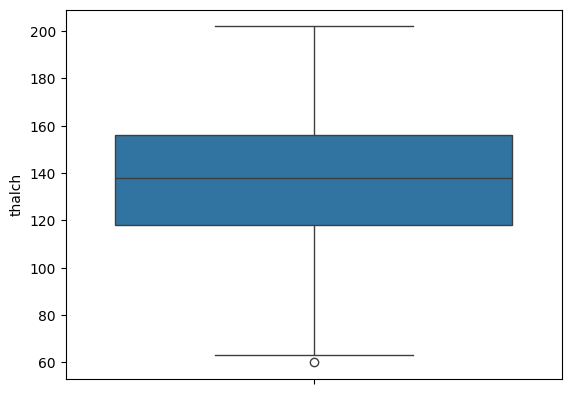

In [ ]:
sns.boxplot(df["thalch"])

<Axes: ylabel='oldpeak'>

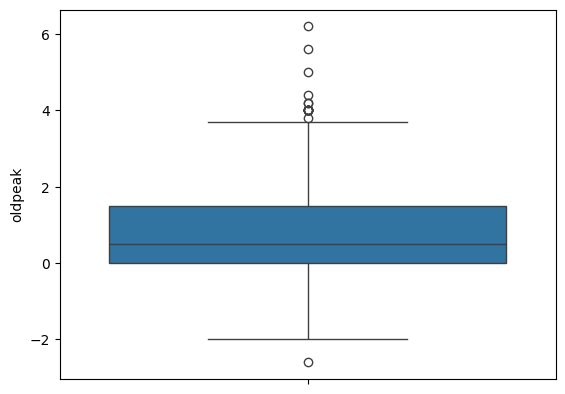

In [ ]:
sns.boxplot(df["oldpeak"])

<Axes: ylabel='num'>

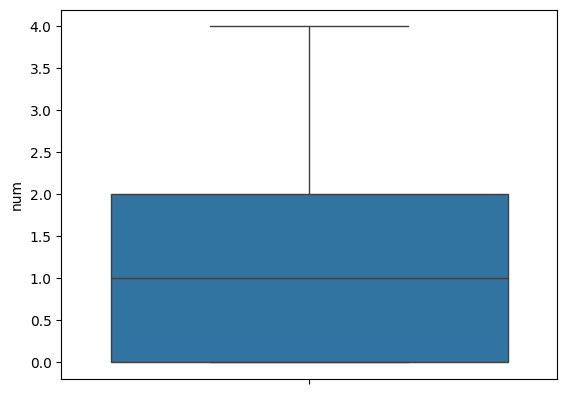

In [ ]:
sns.boxplot(df["num"])

In [ ]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
0,63,Male,typical angina,145,233,True,lv hypertrophy,150,False,2.3,downsloping,fixed defect,0
1,41,Male,atypical angina,135,203,False,normal,132,False,0.0,flat,fixed defect,0
2,57,Male,asymptomatic,140,192,False,normal,148,False,0.4,flat,fixed defect,0
3,52,Male,typical angina,118,186,False,lv hypertrophy,190,False,0.0,flat,fixed defect,0
4,57,Male,asymptomatic,110,201,False,normal,126,True,1.5,flat,fixed defect,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
903,53,Male,asymptomatic,125,0,False,normal,120,False,1.5,upsloping,reversable defect,4
904,62,Male,asymptomatic,166,170,False,st-t abnormality,120,True,3.0,flat,reversable defect,4
905,56,Male,non-anginal,170,0,False,lv hypertrophy,123,True,2.5,downsloping,normal,4
906,56,Male,non-anginal,144,208,True,st-t abnormality,105,TURE,NaN,downsloping,fixed defect,4


In [ ]:
#removing the outliers from age column

# Calculate mean and standard deviation
mean = np.mean(df['age'])
std_dev = np.std(df['age'])

# Calculate Z-scores
df['Z_score'] = (df['age'] - mean) / std_dev

# Define a threshold for identifying outliers
threshold = 3

# Identify outliers
outliers = df[np.abs(df['Z_score']) > threshold]

print("Outliers:")
print(outliers)

# Remove outliers
df_cleaned = df[np.abs(df['Z_score']) <= threshold]
print("\nCleaned Data:")
print(df_cleaned)


Outliers:
Empty DataFrame
Columns: [age, sex, cp, trestbps, chol, fbs, restecg, thalch, exang, oldpeak, slope, thal, num, Z_score]
Index: []

Cleaned Data:
     age   sex               cp  trestbps  chol    fbs           restecg  \
0     63  Male   typical angina       145   233   True    lv hypertrophy   
1     41  Male  atypical angina       135   203  False            normal   
2     57  Male     asymptomatic       140   192  False            normal   
3     52  Male   typical angina       118   186  False    lv hypertrophy   
4     57  Male     asymptomatic       110   201  False            normal   
..   ...   ...              ...       ...   ...    ...               ...   
903   53  Male     asymptomatic       125     0  False            normal   
904   62  Male     asymptomatic       166   170  False  st-t abnormality   
905   56  Male      non-anginal       170     0  False    lv hypertrophy   
906   56  Male      non-anginal       144   208   True  st-t abnormality   
907   57

In [ ]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 901 entries, 0 to 907
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       901 non-null    int64  
 1   sex       901 non-null    object 
 2   cp        901 non-null    object 
 3   trestbps  901 non-null    int64  
 4   chol      901 non-null    int64  
 5   fbs       901 non-null    bool   
 6   restecg   901 non-null    object 
 7   thalch    901 non-null    int64  
 8   exang     901 non-null    object 
 9   oldpeak   841 non-null    float64
 10  slope     901 non-null    object 
 11  thal      901 non-null    object 
 12  num       901 non-null    int64  
 13  Z_score   901 non-null    float64
dtypes: bool(1), float64(2), int64(5), object(6)
memory usage: 99.4+ KB


In [ ]:
#no outliers in the age column

In [ ]:
#removing the outliers from the trestbps column

# Calculate mean and standard deviation
mean = np.mean(df['trestbps'])
std_dev = np.std(df['trestbps'])

# Calculate Z-scores
df['Z_score'] = (df['trestbps'] - mean) / std_dev

# Define a threshold for identifying outliers
threshold = 3

# Identify outliers
outliers = df[np.abs(df['Z_score']) > threshold]

print("Outliers:")
print(outliers)

# Remove outliers
df_cleaned = df[np.abs(df['Z_score']) <= threshold]
print("\nCleaned Data:")
print(df_cleaned)
df=df_cleaned

Outliers:
     age   sex               cp  trestbps  chol    fbs           restecg  \
387   45  Male      non-anginal       193   236  False            normal   
487   54  Male  atypical angina       192   283  False    lv hypertrophy   
768   60  Male     asymptomatic       192   281  False  st-t abnormality   
875   55  Male      non-anginal       193   228  False  st-t abnormality   

     thalch  exang  oldpeak      slope               thal  num   Z_score  
387     188   TURE      NaN       flat  reversable defect    0  3.108427  
487     195  False      0.0  upsloping  reversable defect    1  3.056495  
768     107   TURE      NaN  upsloping             normal    2  3.056495  
875     144   TURE      NaN  upsloping       fixed defect    3  3.108427  

Cleaned Data:
     age   sex               cp  trestbps  chol    fbs           restecg  \
0     63  Male   typical angina       145   233   True    lv hypertrophy   
1     41  Male  atypical angina       135   203  False            n

In [ ]:
#removing the outliers from the trestbps column

# Calculate mean and standard deviation
mean = np.mean(df['trestbps'])
std_dev = np.std(df['trestbps'])

# Calculate Z-scores
df['Z_score'] = (df['trestbps'] - mean) / std_dev

# Define a threshold for identifying outliers
threshold = 3

# Identify outliers
outliers = df[np.abs(df['Z_score']) > threshold]

print("Outliers:")
print(outliers)

# Remove outliers
df_cleaned = df[np.abs(df['Z_score']) <= threshold]
print("\nCleaned Data:")
print(df_cleaned)
df=df_cleaned

Outliers:
     age   sex               cp  trestbps  chol    fbs         restecg  \
243   39  Male  atypical angina       190   241  False          normal   
900   61  Male     asymptomatic       190   287   True  lv hypertrophy   

     thalch  exang  oldpeak        slope               thal  num   Z_score  
243     106  False      0.0         flat             normal    0  3.024559  
900     150   True      2.0  downsloping  reversable defect    4  3.024559  

Cleaned Data:
     age   sex               cp  trestbps  chol    fbs           restecg  \
0     63  Male   typical angina       145   233   True    lv hypertrophy   
1     41  Male  atypical angina       135   203  False            normal   
2     57  Male     asymptomatic       140   192  False            normal   
3     52  Male   typical angina       118   186  False    lv hypertrophy   
4     57  Male     asymptomatic       110   201  False            normal   
..   ...   ...              ...       ...   ...    ...           

In [ ]:

#removing the outliers from the chol column


# Calculate mean and standard deviation
mean = np.mean(df['chol'])
std_dev = np.std(df['chol'])

# Calculate Z-scores
df['Z_score'] = (df['chol'] - mean) / std_dev

# Define a threshold for identifying outliers
threshold = 3

# Identify outliers
outliers = df[np.abs(df['Z_score']) > threshold]

print("Outliers:")
print(outliers)

# Remove outliers
df_cleaned = df[np.abs(df['Z_score']) <= threshold]
print("\nCleaned Data:")
print(df_cleaned)
df=df_cleaned

Outliers:
     age     sex            cp  trestbps  chol    fbs         restecg  thalch  \
157   67  Female   non-anginal       115   564  False  lv hypertrophy     160   
570   54    Male  asymptomatic       130   603   True          normal     125   

     exang  oldpeak slope               thal  num   Z_score  
157  False      1.6  flat  reversable defect    0  3.240747  
570   True      1.0  flat       fixed defect    1  3.589343  

Cleaned Data:
     age   sex               cp  trestbps  chol    fbs           restecg  \
0     63  Male   typical angina       145   233   True    lv hypertrophy   
1     41  Male  atypical angina       135   203  False            normal   
2     57  Male     asymptomatic       140   192  False            normal   
3     52  Male   typical angina       118   186  False    lv hypertrophy   
4     57  Male     asymptomatic       110   201  False            normal   
..   ...   ...              ...       ...   ...    ...               ...   
903   53  Mal

In [ ]:

#removing the outliers from the thalch column

# Calculate mean and standard deviation
mean = np.mean(df['thalch'])
std_dev = np.std(df['thalch'])

# Calculate Z-scores
df['Z_score'] = (df['thalch'] - mean) / std_dev

# Define a threshold for identifying outliers
threshold = 3

# Identify outliers
outliers = df[np.abs(df['Z_score']) > threshold]

print("Outliers:")
print(outliers)

# Remove outliers
df_cleaned = df[np.abs(df['Z_score']) <= threshold]
print("\nCleaned Data:")
#print(df_cleaned)
df=df_cleaned

Outliers:
     age   sex            cp  trestbps  chol    fbs restecg  thalch  exang  \
676   51  Male  asymptomatic       140     0  False  normal      60  False   

     oldpeak slope    thal  num   Z_score  
676      0.0  flat  normal    2 -3.015996  

Cleaned Data:


In [ ]:
#removing the outliers from the oldpeak column

# Calculate mean and standard deviation
mean = np.mean(df['oldpeak'])
std_dev = np.std(df['oldpeak'])

# Calculate Z-scores
df['Z_score'] = (df['oldpeak'] - mean) / std_dev

# Define a threshold for identifying outliers
threshold = 3

# Identify outliers
outliers = df[np.abs(df['Z_score']) > threshold]

print("Outliers:")
print(outliers)

# Remove outliers
df_cleaned = df[np.abs(df['Z_score']) <= threshold]
print("\nCleaned Data:")
print(df_cleaned)
df=df_cleaned

Outliers:
     age     sex            cp  trestbps  chol    fbs           restecg  \
537   52    Male  asymptomatic       160   246  False  st-t abnormality   
722   63    Male  asymptomatic       140   187  False    lv hypertrophy   
773   61    Male  asymptomatic       120   282  False  st-t abnormality   
839   74    Male  asymptomatic       150   258   True  st-t abnormality   
889   63  Female  asymptomatic       150   407  False    lv hypertrophy   
898   64    Male  asymptomatic       134   273  False            normal   
899   65    Male  asymptomatic       136   248  False            normal   

     thalch  exang  oldpeak        slope               thal  num   Z_score  
537      82   True      4.0         flat       fixed defect    1  3.042703  
722     144   True      4.0    upsloping  reversable defect    2  3.042703  
773     135   True      4.0  downsloping       fixed defect    3  3.042703  
839     130   True      4.0  downsloping  reversable defect    3  3.042703  
889 

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 821 entries, 0 to 905
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       821 non-null    int64  
 1   sex       821 non-null    object 
 2   cp        821 non-null    object 
 3   trestbps  821 non-null    int64  
 4   chol      821 non-null    int64  
 5   fbs       821 non-null    bool   
 6   restecg   821 non-null    object 
 7   thalch    821 non-null    int64  
 8   exang     821 non-null    object 
 9   oldpeak   821 non-null    float64
 10  slope     821 non-null    object 
 11  thal      821 non-null    object 
 12  num       821 non-null    int64  
 13  Z_score   821 non-null    float64
dtypes: bool(1), float64(2), int64(5), object(6)
memory usage: 90.6+ KB


In [ ]:
# removed all the outliers from the data

In [ ]:
#3. Feature Engineering:
#If necessary, perform feature engineering techniques such as encoding categorical variables,
#scaling numerical features, or handling missing values.

ss=StandardScaler()
df_ss=df.drop(df.columns[[1,2,6,8,10,11,12,13]],axis=1)
df_ssf=ss.fit_transform(df_ss)
df_ssf=pd.DataFrame(df_ssf)
df_ssf.columns=list(df_ss)

In [ ]:
df_ssf.head(3)
#df.head(1)

,age,trestbps,chol,fbs,thalch,oldpeak
0,1.064291,0.732643,0.284834,2.081146,0.495777,1.473504
1,-1.349473,0.171123,0.011986,-0.480504,-0.211082,-0.840549
2,0.405991,0.451883,-0.088058,-0.480504,0.417237,-0.438105


In [ ]:
#to label encoding the data creating  a new DataFrame which only contains categorical variable
df_cat=df.drop(df.columns[[0,3,4,7,9,13]],axis=1)
df_cat.head(10)

,sex,cp,fbs,restecg,exang,slope,thal,num
0,Male,typical angina,True,lv hypertrophy,False,downsloping,fixed defect,0
1,Male,atypical angina,False,normal,False,flat,fixed defect,0
2,Male,asymptomatic,False,normal,False,flat,fixed defect,0
3,Male,typical angina,False,lv hypertrophy,False,flat,fixed defect,0
4,Male,asymptomatic,False,normal,True,flat,fixed defect,0
5,Male,asymptomatic,False,lv hypertrophy,False,upsloping,fixed defect,0
6,Male,non-anginal,False,normal,True,upsloping,fixed defect,0
7,Male,non-anginal,False,normal,False,downsloping,fixed defect,0
8,Male,atypical angina,True,normal,False,downsloping,fixed defect,0
10,Female,typical angina,False,st-t abnormality,False,downsloping,fixed defect,0


In [ ]:
#to check the num is categorical data or not
df["num"].value_counts()

,count
num,
0,375
1,244
2,99
3,82
4,21


In [ ]:
#Label encoding the categorical data
LE=LabelEncoder()
df_cat_LE=pd.DataFrame()
df_cat_LE["sex"]=LE.fit_transform(df_cat["sex"])
df_cat_LE["cp"]=LE.fit_transform(df_cat["cp"])

df_cat_LE["restecg"]=LE.fit_transform(df_cat["restecg"])

df_cat_LE["slope"]=LE.fit_transform(df_cat["slope"])
df_cat_LE["thal"]=LE.fit_transform(df_cat["thal"])
df_cat_LE["num"]=LE.fit_transform(df_cat["num"])

In [ ]:
df['exang'] = df['exang'].replace({'TRUE': True, 'FALSE': False})
df['fbs'] = df['fbs'].replace({'TRUE': True, 'FALSE': False})
# Convert Python boolean values to integers
df['exang'] = df['exang'].astype(int)
df_bool=pd.DataFrame()

<ipython-input-99-4003958c83a1>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['exang'] = df['exang'].replace({'TRUE': True, 'FALSE': False})


In [ ]:
df_bool['exang'] = df['exang'].astype(int)
df_bool['fbs'] = df['fbs'].astype(int)

In [ ]:
df_bool

,exang,fbs
0,0,1
1,0,0
2,0,0
3,0,0
4,1,0
...,...,...
901,0,1
902,1,1
903,0,0
904,1,0


In [ ]:
df_final=pd.concat([df_bool,df_cat_LE,df_ssf],axis=1)

In [ ]:
df_final.head(25)


,exang,fbs,sex,cp,restecg,slope,thal,num,age,trestbps,chol,fbs,thalch,oldpeak
0,0.0,1.0,1.0,3.0,0.0,0.0,0.0,0.0,1.064291,0.732643,0.284834,2.081146,0.495777,1.473504
1,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,-1.349473,0.171123,0.011986,-0.480504,-0.211082,-0.840549
2,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.405991,0.451883,-0.088058,-0.480504,0.417237,-0.438105
3,0.0,0.0,1.0,3.0,0.0,1.0,0.0,0.0,-0.142591,-0.783460,-0.142628,-0.480504,2.066576,-0.840549
4,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.405991,-1.232676,-0.006204,-0.480504,-0.446702,0.668616
5,0.0,0.0,1.0,0.0,0.0,2.0,0.0,0.0,1.393440,1.574923,0.239360,-0.480504,0.024538,1.473504
6,1.0,0.0,1.0,2.0,1.0,2.0,0.0,0.0,0.296275,-0.109637,0.675916,-0.480504,-0.368162,0.165561
7,0.0,0.0,1.0,2.0,1.0,0.0,0.0,0.0,-0.581458,-1.232676,0.084746,-0.480504,0.024538,-0.840549
8,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.405991,0.451883,0.530397,2.081146,0.103078,-0.840549
10,0.0,0.0,0.0,3.0,1.0,0.0,1.0,0.0,1.393440,1.013403,0.221170,-0.480504,-0.917941,1.775337


In [ ]:
df_final.isnull().sum()

,0
exang,63
fbs,63
sex,63
cp,63
restecg,63
slope,63
thal,63
num,63
age,63
trestbps,63


In [ ]:
df_model_ready=df_final.dropna()

In [ ]:
df_model_ready.isnull().sum()

,0
exang,0
fbs,0
sex,0
cp,0
restecg,0
slope,0
thal,0
num,0
age,0
trestbps,0


In [ ]:
df_model_ready.info()

<class 'pandas.core.frame.DataFrame'>
Index: 758 entries, 0 to 820
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   exang     758 non-null    float64
 1   fbs       758 non-null    float64
 2   sex       758 non-null    float64
 3   cp        758 non-null    float64
 4   restecg   758 non-null    float64
 5   slope     758 non-null    float64
 6   thal      758 non-null    float64
 7   num       758 non-null    float64
 8   age       758 non-null    float64
 9   trestbps  758 non-null    float64
 10  chol      758 non-null    float64
 11  fbs       758 non-null    float64
 12  thalch    758 non-null    float64
 13  oldpeak   758 non-null    float64
dtypes: float64(14)
memory usage: 88.8 KB


In [ ]:
#4Decision Tree Classification: Split the dataset into training and testing sets
#(e.g., using an 80-20 split). Implement a Decision Tree Classification model using
#a library like scikit-learn. Train the model on the training set and evaluate its
#performance on the testing set using appropriate evaluation metrics (e.g., accuracy,
#precision, recall, F1-score, ROC-AUC).


#assigning data to the x and y  variable
x=df_model_ready.drop(columns=["num"])
y=df_model_ready["num"]

#splitign the data set using train_test_split with 80/20 ratio
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

#initializing the DecisionTreeClassifier
DTR=DecisionTreeClassifier()

#fitting the model
model=DTR.fit(x_train,y_train)
print("Number of nodes in the tree:", model.tree_.node_count)
print("Maximum depth of the tree:", model.get_depth())
print("Minimum samples required to split an internal node:", model.min_samples_split)

Number of nodes in the tree: 357
Maximum depth of the tree: 13
Minimum samples required to split an internal node: 2


In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report

In [ ]:
#model is predicting the target using unseen data and that storing it in the y_pred
y_pred = model.predict(x_test)

In [ ]:
probabilities = model.predict_proba(x_test)


In [ ]:
# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
#precision = precision_score(y_test, y_pred)
#recall = recall_score(y_test, y_pred)
#f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, probabilities, multi_class='ovr')
# For ROC-AUC, need probabilities
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

In [ ]:
# Print metrics
print("\nEvaluation Metrics:")
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")
print(f"ROC-AUC Score: {roc_auc:.2f}")



Evaluation Metrics:
Accuracy: 0.64
Precision: 0.43
Recall: 0.44
F1 Score: 0.43
ROC-AUC Score: 0.66


In [ ]:
# Classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

         0.0       0.78      0.85      0.81        80
         1.0       0.55      0.46      0.50        35
         2.0       0.38      0.42      0.40        19
         3.0       0.45      0.45      0.45        11
         4.0       0.00      0.00      0.00         7

    accuracy                           0.64       152
   macro avg       0.43      0.44      0.43       152
weighted avg       0.62      0.64      0.63       152



In [ ]:
#5. Hyperparameter Tuning:
#Perform hyperparameter tuning to optimize the Decision Tree model.
#Experiment with different hyperparameters such as maximum depth, minimum samples split,
#and criterion.

In [ ]:
# Define the parameter grid
param_grid = {
    'criterion': ['gini', 'entropy'],  # Function to measure the quality of a split
    'max_depth': [None, 1,2,3,4,5,6,7,8,9,10,11,12,13,14,15],  # Maximum depth of the tree
    'min_samples_split': [1, 2, 3, 4,5],#Minimum number of samples required to split an internal node
}


In [ ]:
from sklearn.model_selection import   GridSearchCV

import warnings
warnings.filterwarnings("ignore")
# Initialize the Decision Tree Classifier
dt = DecisionTreeClassifier(random_state=42)

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=dt, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)

# Fit GridSearchCV to the training data
grid_search.fit(x_train, y_train)


Fitting 5 folds for each of 160 candidates, totalling 800 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11,
                                       12, 13, 14, 15],
                         'min_samples_split': [1, 2, 3, 4, 5]},
             verbose=2)

In [ ]:
# Best parameters found
print("Best Parameters:", grid_search.best_params_)

# Best model
best_model = grid_search.best_estimator_

# Predict and evaluate the model
y_pred = best_model.predict(x_test)
probabilities = best_model.predict_proba(x_test)

# Classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Compute ROC-AUC for multiclass (one-vs-rest approach)
roc_auc = roc_auc_score(y_test, probabilities, multi_class='ovr')
print(f"ROC-AUC Score: {roc_auc:.2f}")


Best Parameters: {'criterion': 'gini', 'max_depth': 4, 'min_samples_split': 2}

Classification Report:
              precision    recall  f1-score   support

         0.0       0.74      0.84      0.79        80
         1.0       0.42      0.51      0.46        35
         2.0       0.50      0.32      0.39        19
         3.0       0.29      0.18      0.22        11
         4.0       0.00      0.00      0.00         7

    accuracy                           0.61       152
   macro avg       0.39      0.37      0.37       152
weighted avg       0.57      0.61      0.59       152

ROC-AUC Score: 0.78


# Model Evaluation and Analysis:
6 Analyse the performance of the Decision Tree model using the evaluation metrics obtained.
Visualize the decision tree structure to understand the rules learned by the model and identify important features

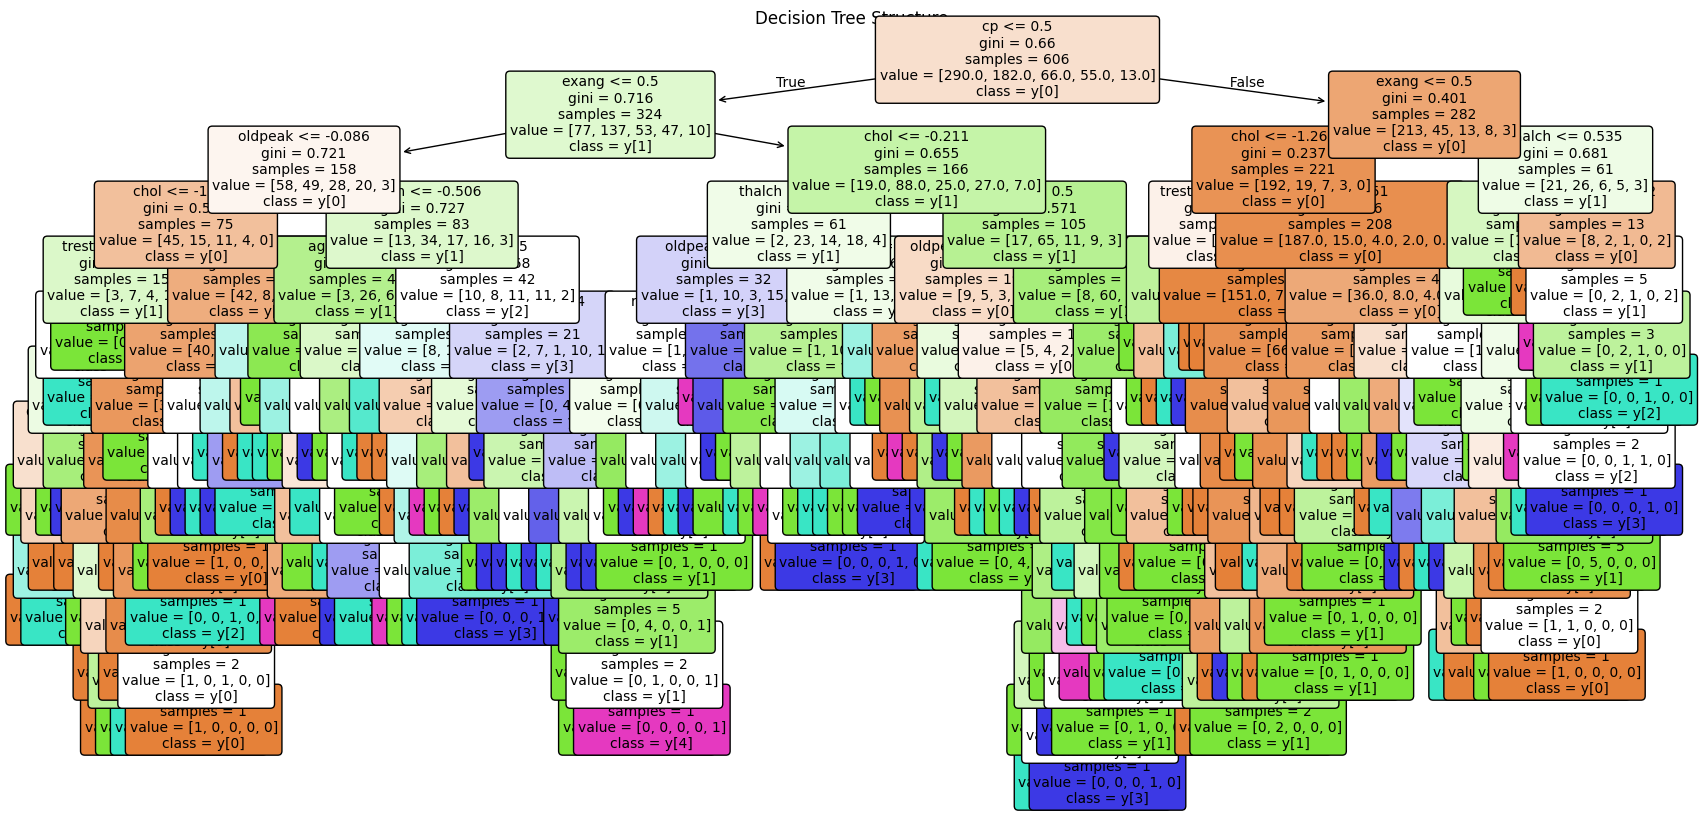

In [ ]:



from sklearn import tree
decision_tree_model=DTR

# Visualize the decision tree structure
plt.figure(figsize=(20, 10))
tree.plot_tree(decision_tree_model, feature_names=x_train.columns, class_names=True, filled=True, rounded=True, fontsize=10)
plt.title('Decision Tree Structure')
plt.show()


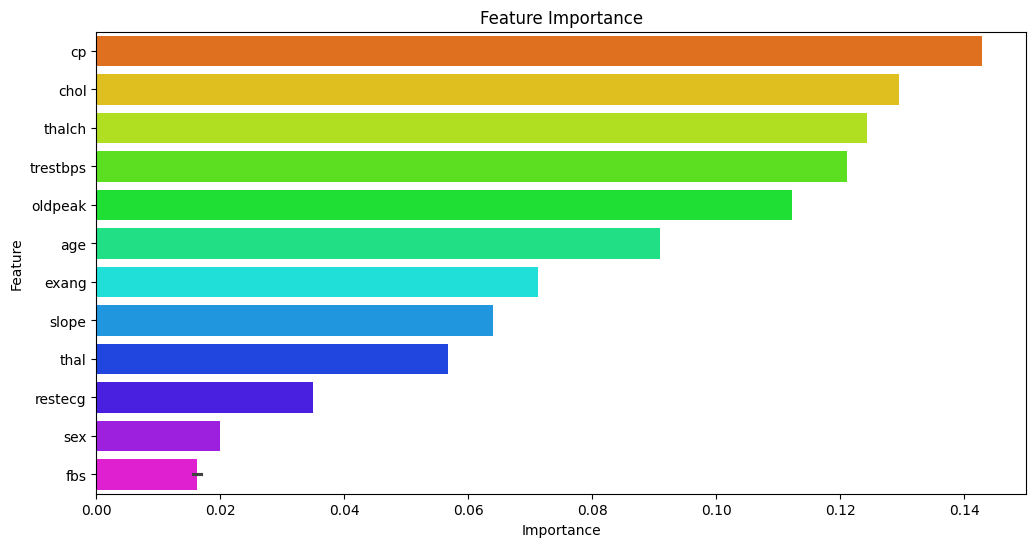

In [ ]:
# Feature importance
feature_importances = decision_tree_model.feature_importances_
importance_df = pd.DataFrame({'Feature': x_train.columns, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Plot feature importance
plt.figure(figsize=(12, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df,palette=sns.color_palette("hsv", len(importance_df)))
plt.title('Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()



In [ ]:
#What are some common hyperparameters of decision tree models, and how do they affect the model's performance?
common hyperparameters used in the decision_tree_model are :
max_depth  min_samples_split min_samples_leaf criterion  max_leaf_nodes max_features


max_depth = it  limits the maximum depth of the tree and too shallow will create underfitting problem and too deep will create overfitting problem

min_samples_split = it indicates the minimum number of samples required to split a node. Higher  the value reduces the growth of the tree and lower value
creates deeper tree means overfitting

min_samples_leaf = it is the criteria for the minimum number of samples required to be at a leaf node.
Higher its  values creates broader, shallower trees. Helps prevent overfitting and
lower values allows smaller leaves, which might increase variance.

In [ ]:
#What is the difference between the Label encoding and One-hot encoding?

 Label encoding assigns integers to categories, but can imply false ordinal relationships.
  One-hot encoding creates binary columns for each category, avoiding implied ordering

Label Encoding is suitable when there is an intrinsic order in the categories, whereas One-Hot Encoding is better for nominal categories.